In [3]:
import pandas as pd

from pylab import *

import matplotlib.pyplot as plt
import sklearn

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report


In [4]:
df_master = pd.read_csv('drug_users.csv')
print(df_master)

          Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0     0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1    -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2     0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3    -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4     0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
5     2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033   
6     1.09449 -0.48246    1.16365 -0.57009   -0.31685 -0.46725 -1.09207   
7     0.49788 -0.48246   -1.73790  0.96082   -0.31685 -1.32828  1.93886   
8     0.49788  0.48246   -0.05921  0.24923   -0.31685  0.62967  2.57309   
9     1.82213 -0.48246    1.16365  0.96082   -0.31685 -0.24649  0.00332   
10   -0.07854  0.48246    0.45468  0.96082   -0.31685 -1.05308  0.80523   
11    1.09449 -0.48246   -0.61113 -0.28519   -0.31685 -1.32828  0.00332   
12    1.82213  0.48246   

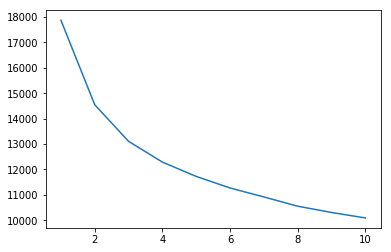

In [11]:
sse = []
for k in range(1, 11):
    df = df_master.copy()
    km = KMeans(n_clusters=k)
    km.fit(df)
    x = km.fit_predict(df)
    sse.append(km.inertia_)

x = [k for k in range(1,11)]

plt.plot(x,sse)

In [13]:
#Viz and PCA
from sklearn.model_selection import train_test_split
df_viz = df_master.copy()
lbl_junk = [0 for i in range(0,len(df))]
X_train, X_test, y_train, y_test = train_test_split(df_viz, lbl_junk, test_size=0.3, random_state=4)

#Demo
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

In [14]:
km = KMeans(n_clusters=2)
km.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
#Labels for X_train
train_pred = km.fit_predict(X_train)

#Labels for X_test
test_pred = km.fit_predict(X_test)

[]

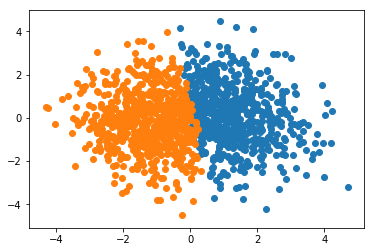

In [16]:
from sklearn.decomposition import PCA

#Viz for the training set
#X_train = X_train.drop('CLASS', axis=1)
#print(X_train)
pca1 = PCA(n_components=2)
pca1.fit(X_train)
set_train = pca1.fit_transform(X_train)
#print(set_train)

x_ = set_train[:,0]
y_ = set_train[:,1]


x_0 = []
y_0 = []
x_1 = []
y_1 = []

for i in range(len(x_)):
    if train_pred[i] == 0:
        x_0.append(x_[i])
        y_0.append(y_[i])
    else:
        x_1.append(x_[i])
        y_1.append(y_[i])

plt.scatter(x_0, y_0)
plt.scatter(x_1, y_1)
plt.plot()

In [18]:
#mport AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train =pairwise_distances(X_train,Y=None,metric='euclidean')    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html

data = df.iloc[:, 1:13].values


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
cluster = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')     #https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
cluster.fit_predict(data)
X_train, X_test, y_train, y_test = train_test_split(df.values, df.CLASS, test_size=0.3)
cluster.fit(X_train, y_train)        
y_pred = cluster.fit_predict(X_test)
print("F1-score for complete linkage + cosine")
a=f1_score(y_test, y_pred)
print(a)


F1-score for complete linkage + cosine
0.20622568093385213
